Przyczynowość i jej wykrywanie
---------------
*Wiktor Soral 15.06.2016*

Wyobraźmy sobie 2 zmienne pozostające ze sobą w pewnej zależności. Prosty wykres rozrzutu pozwoli nam zobrazować tą zależność.

$y = 2 + 0.5x - 0.1x^2 + 0.01x^3 + e$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm
%matplotlib notebook
import matplotlib as mpl

In [ ]:
x = np.random.uniform(0,10,200)
e = np.random.normal(0,1, 200)
def zaleznosc(exog):
    return 2 + 0.5*exog - 0.1*exog**2 + 0.01*exog**3
y = zaleznosc(x) + e

<IPython.core.display.Javascript object>


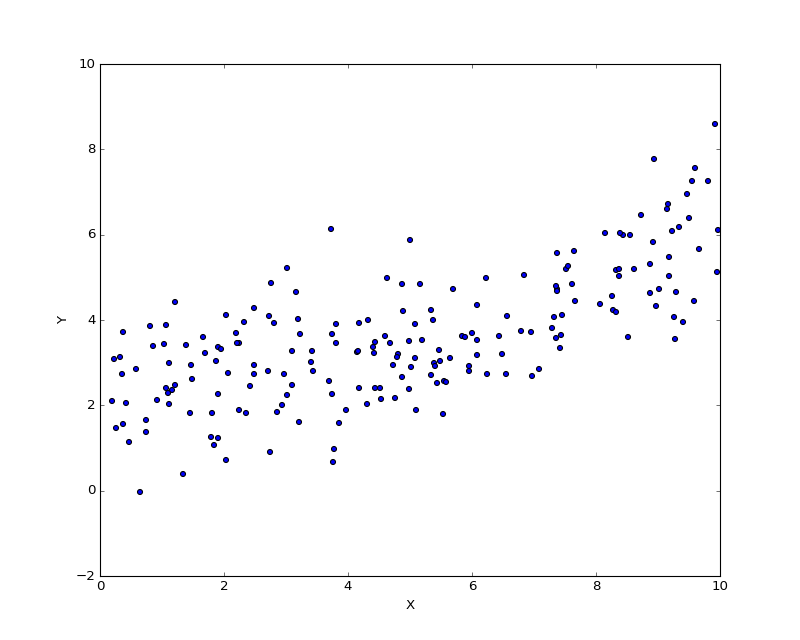

(0, 10)

In [6]:
plt.scatter(x,y)
plt.xlabel("X");plt.ylabel("Y");plt.xlim(0,10)

Oczywiście taki wykres rozrzutu nie mówi nam nic o charakterze przyczynowym relacji pomiędzy tymi zmiennymi. Zakładając jednak, że prawdziwe jest jedno z 2:
- X --> Y
- Y --> X

możemy oczekiwać pewnej asymetrii w rozkładzie obu zmiennych. Wynika to z faktu, że:

$y = f(x) + \epsilon$

gdzie

$\epsilon \sim N(0,\sigma)$

In [ ]:
def probability(x,y,sd):
    mu = zaleznosc(y)
    dist = norm(loc = mu, scale = sd)
    return dist.pdf(x)

X = np.r_[0:10:100j]
Y = np.r_[0:10:100j]
x, y  = np.mgrid[0:10:100j, 0:10:100j]
Z = probability(x,y,1)

<IPython.core.display.Javascript object>


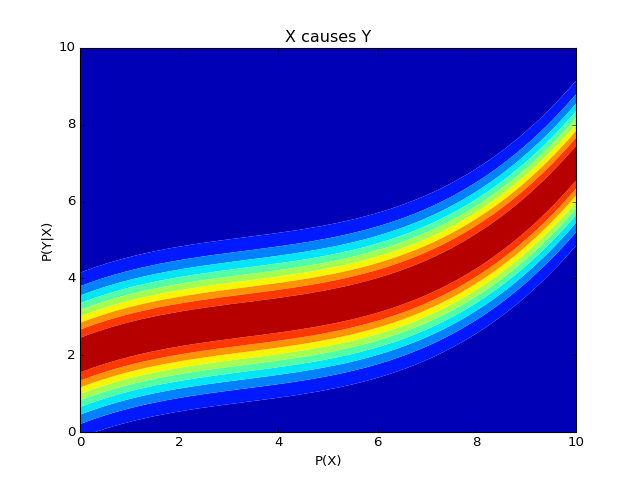

In [3]:
CS = plt.contourf(X,Y,Z, 10, antialiased= True)
plt.xlabel("P(X)"); plt.ylabel("P(Y|X)"); plt.title("X causes Y")

In [ ]:
def probability2(x,y,sd):
    mu = zaleznosc(y)
    dist = norm(loc = mu, scale = np.exp(np.abs(y-5)*0.1*sd))
    return dist.pdf(x)

Z2 = probability2(x,y,1)

<IPython.core.display.Javascript object>


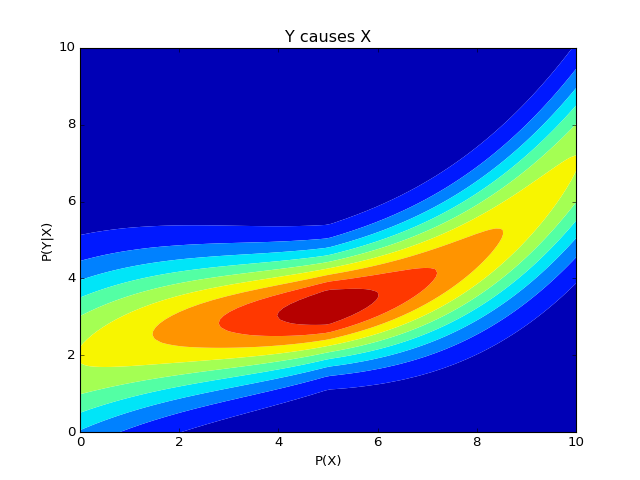

In [4]:
plt.contourf(X,Y,Z2, 10, antialiased= True)
plt.xlabel("P(X)");plt.ylabel("P(Y|X)");plt.title("Y causes X")